[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]
 [1.58345008]
 [1.05778984]
 [1.13608912]
 [1.85119328]
 [0.14207212]
 [0.1742586 ]
 [0.04043679]
 [1.66523969]
 [1.5563135 ]
 [1.7400243 ]
 [1.95723668]
 [1.59831713]
 [0.92295872]
 [1.56105835]
 [0.23654885]
 [1.27984204]
 [0.28670657]
 [1.88933783]
 [1.04369664]
 [0.82932388]
 [0.52911122]
 [1.54846738]
 [0.91230066]
 [1.1368679 ]
 [0.0375796 ]
 [1.23527099]
 [1.22419145]
 [1.23386799]
 [1.88749616]
 [1.3636406 ]
 [0.7190158 ]
 [0.87406391]
 [1.39526239]
 [0.12045094]
 [1.33353343]
 [1.34127574]
 [0.42076512]
 [0.2578526 ]
 [0.6308567 ]
 [0.72742154]
 [1.14039354]
 [0.87720303]
 [1.97674768]
 [0.20408962]
 [0.41775351]
 [0.32261904]
 [1.30621665]
 [0.50658321]
 [0.93262155]
 [0.48885118]
 [0.31793917]
 [0.22075028]
 [1.31265918]
 [0.2763659 ]
 [0.39316472]
 [0.73745034]
 [1.64198646]
 [0.19420255]
 [1.67588981]
 [0.19219682]
 [1.95291893]
 [0.93

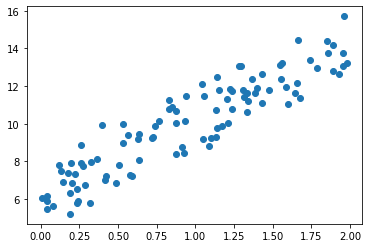

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X + 6 식을 근사 (w1 = 4, w0 = 6). random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot 으로 시각화
print(X)
print(y)
plt.scatter(X,y)

In [38]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 내적으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [39]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여
    # w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.022 w0:6.162
Gradient Descent Total Cost(RSS):0.9935


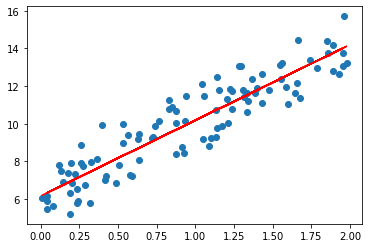

In [40]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N  # 오차값
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"Gradient Descent Total Cost(RSS):{get_cost(y, y_pred):.4f}")
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

In [41]:
# 샘플링으로 데이터를 추출하여 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.1)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

w1 : 4.028, wo : 6.165
Stochastic Gradient Descent Total Cost : 0.9936


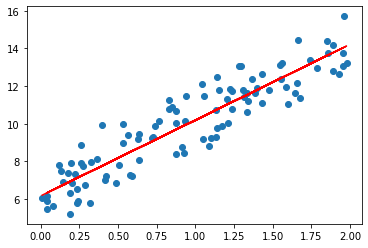

In [42]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print(f"w1 : {round(w1[0,0],3)}, wo : {round(w0[0,0],3)}")
y_pred = w1[0,0] * X + w0
print(f"Stochastic Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}")
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

In [43]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg=linear_model.LinearRegression()

X=[[174],[152],[138],[128],[186]]
y=[71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[165]]))

[67.30998637]


<function matplotlib.pyplot.show(close=None, block=None)>

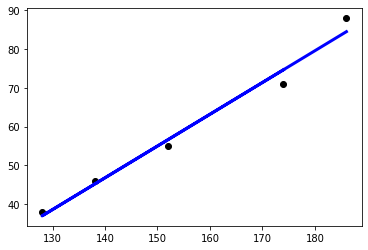

In [44]:
plt.scatter(X,y,color='black')

y_pred=reg.predict(X)

plt.plot(X,y_pred,color='blue',linewidth=3)
plt.show

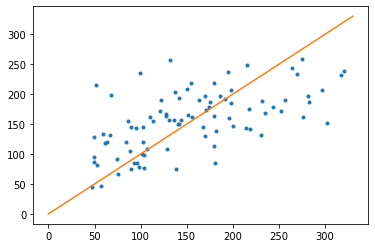

In [45]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes=datasets.load_diabetes()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,test_size=0.2,random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
plt.plot(y_test,y_pred,'.')

x=np.linspace(0,330,100)
y=x
plt.plot(x,y)
plt.show()